<a href="https://colab.research.google.com/github/a-winders/MLA_ATW/blob/main/MLA4_ATW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 4
# Adam Winders 
# CS430-ON 
# Machine Learning in the Cloud
<br>


## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
Imports for tree

In [ ]:
from sklearn import tree
from sklearn.tree import export_text

## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# Line Plots

Plots straight line on a plot

In [ ]:
def abline(slope, intercept,color):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c=color)

Draws the plot margins similar to the book

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
  
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

# Problem 1

### Acquire Data

Loads **banknote_authentication.csv** into a dataframe namned **df**

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Bellarmine/CS430_Data_Files/banknote_authentication.csv')

### Splitting Data into Train/Test

Creates a dataframe called **X** that includes all columns except *date* and *forgery*
<br>
Creates a dataframe called **y** that only includes *forgery*

In [ ]:
X = df[['variance','skewness','curtosis','entropy']]
y = df['forgery']

Splits the data into Train/Test sets, and uses 20% of the data for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=32)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

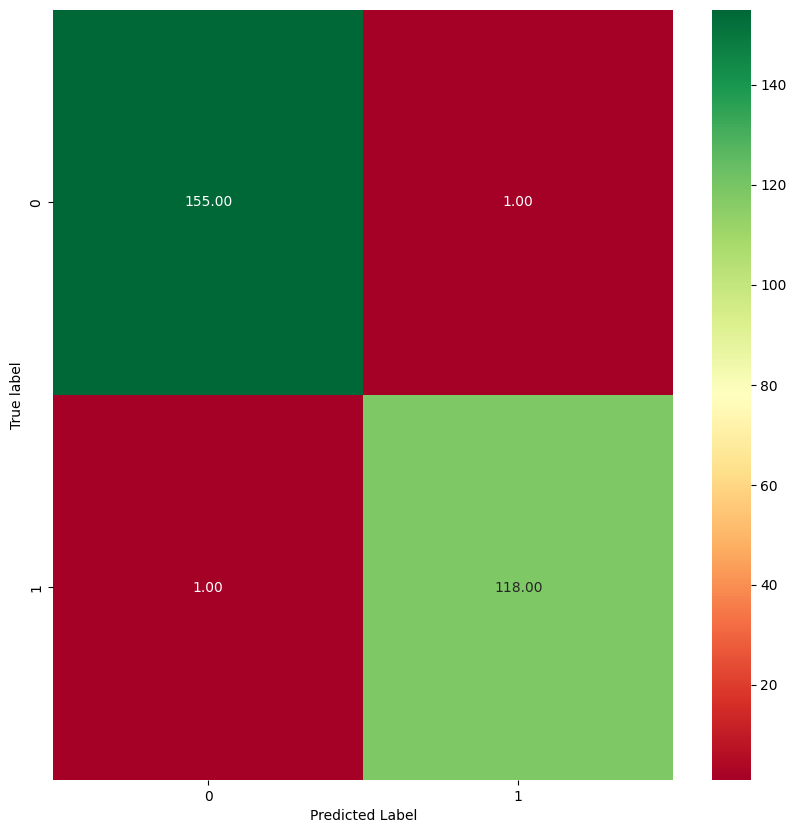

In [ ]:
plot_cm(y_test,y_pred)

### Building the Pipeline

Creates a column transformer that will MinMax scale the numerical variables

In [ ]:
num_attribs = ['variance','skewness','curtosis','entropy']


In [ ]:
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(), num_attribs),]
                  )

Creates a pipeline that will transform the data and then run the DecisionTreeClassification algorithm

In [ ]:
# TODO

### Executing the Model

Runs the pipeline to fit the DecisionTreeClassification model

---



In [ ]:
# TODO

### Evaluating Model

Runs the pipeline to predict y values and saves them in a variable called y_pred

In [ ]:
y_pred = pipeline.predict(X_test)

NameError: ignored

Calls the plot_cm function to generate the confusion matrix

In [ ]:
plot_cm(y_test,y_pred)

Calculates the precision, recall, and F1 score

In [ ]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

### Conclusion




```
# TODO
```



# Problem 2

### Acquire Data

Loads the **Steel_industry_data.csv** into a dataframe named df

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Bellarmine/CS430_Data_Files/Steel_industry_data.csv')

Renames the columns according to **Table 1: Columns Names**

In [ ]:
df.rename(columns=
          {'Usage_kWh':'usage_kwh'
          ,'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh'
          ,'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh'
          ,'Lagging_Current_Power_Factor':'lag_current_pwr'
          ,'Leading_Current_Power_Factor':'lead_current_pwr'
          ,'NSM':'nsm'
          ,'WeekStatus':'week_status'
          ,'Day_of_week':'day_of_week'
          ,'Load_Type':'load_type'
           }, inplace = True)

### Splitting Data into Train/Test

Creates a data frame called **X** of your inputs that includes all columns except *date* and *usage_kwh*
<br>
Creates a data frame called **y** of your output that only includes *usage_kwh*

In [ ]:
X = df[['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm', 'week_status', 'day_of_week', 'load_type']]
y = df['usage_kwh']

Splits the data into Train/Test sets. Uses 20% of the data for testing.
<br>
 4 data frames: **X_train**, **X_test**, **y_train**, **y_test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Building the Pipeline

Creates a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables

In [ ]:
num_attribs = ['lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm'] 
cat_attribs = ['week_status','day_of_week','load_type']

In [ ]:
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(),num_attribs),
                               ('cat', OneHotEncoder(), cat_attribs)],
                               remainder='passthrough'
                  )

Creates a pipeline that will transform the data and then run an SVM

In [ ]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('SVR', SVR(kernel="linear", C=75, max_iter=100000, epsilon=0.0)),
                     ])

### Executing the Model

Runs the pipeline to fit the SVM Regression

In [ ]:
pipeline.fit(X_train,np.ravel(y_train))

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr', 'nsm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type'])])),
                ('SVR',
                 SVR(C=75, epsilon=0.0, kernel='linear', max_iter=100000))])

### Evaluating Model

Runs the pipeline to predict *y* values from the test data and saves them into a variable called **y_pred**

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
y_pred

array([41.91723183,  3.85661433,  3.93201025, ..., 85.95935848,
        2.9477241 ,  2.68413659])

Calculats the Root Mean Squared Error for both train and test

In [ ]:
print(mean_squared_error(y_test, y_pred)**(0.5))
print(mean_absolute_error(y_test, y_pred))

5.130030298696475
2.476442088916259


In [ ]:
lr_pipeline = Pipeline([
                     ('trans', col_transform),
                     ('lr', LinearRegression()),
                     ])

In [ ]:
lr_pipeline.fit(X_train,y_train)
y_pred_lr = lr_pipeline.predict(X_test)

In [ ]:
print(mean_squared_error(y_test, y_pred_lr)**(0.5))
print(mean_absolute_error(y_test, y_pred_lr))

5.049577365044994
2.576803318528824


### Conclusion
